In [76]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [77]:
import seaborn as sns
! conda install seaborn -y 

Solving environment: done

# All requested packages already installed.



In [78]:
pig = pd.read_csv("allegations_20200726939.csv")

In [79]:
pig.columns

Index(['unique_mos_id', 'first_name', 'last_name', 'command_now',
       'complaint_id', 'month_received', 'year_received', 'month_closed',
       'year_closed', 'command_at_incident', 'rank_abbrev_incident',
       'rank_abbrev_now', 'rank_now', 'rank_incident', 'mos_ethnicity',
       'mos_gender', 'mos_age_incident', 'complainant_ethnicity',
       'complainant_gender', 'complainant_age_incident', 'fado_type',
       'allegation', 'precinct', 'contact_reason', 'outcome_description',
       'board_disposition'],
      dtype='object')

In [80]:
pig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_mos_id             33358 non-null  int64  
 1   first_name                33358 non-null  object 
 2   last_name                 33358 non-null  object 
 3   command_now               33358 non-null  object 
 4   complaint_id              33358 non-null  int64  
 5   month_received            33358 non-null  int64  
 6   year_received             33358 non-null  int64  
 7   month_closed              33358 non-null  int64  
 8   year_closed               33358 non-null  int64  
 9   command_at_incident       31814 non-null  object 
 10  rank_abbrev_incident      33358 non-null  object 
 11  rank_abbrev_now           33358 non-null  object 
 12  rank_now                  33358 non-null  object 
 13  rank_incident             33358 non-null  object 
 14  mos_et

In [81]:
pig.describe()

,unique_mos_id,complaint_id,month_received,year_received,month_closed,year_closed,mos_age_incident,complainant_age_incident,precinct
count,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,28546.000000,33334.000000
mean,18169.912495,23905.058217,6.323551,2010.726782,6.470772,2011.525661,32.346873,32.484201,64.365213
std,9566.316896,11954.434138,3.362951,6.034725,3.343372,6.085907,6.040944,28.408963,31.451592
min,2.000000,517.000000,1.000000,1985.000000,1.000000,1985.000000,20.000000,-4301.000000,0.000000
25%,9671.000000,13684.750000,3.000000,2007.000000,4.000000,2008.000000,28.000000,23.000000,43.000000
50%,19215.000000,25132.000000,6.000000,2012.000000,6.000000,2013.000000,31.000000,30.000000,67.000000
75%,25412.000000,34252.000000,9.000000,2016.000000,9.000000,2016.000000,36.000000,41.000000,81.000000
max,36374.000000,43703.000000,12.000000,2020.000000,12.000000,2020.000000,60.000000,101.000000,1000.000000


In [82]:
pig['full_name'] = pig[['first_name', 'last_name']].apply(lambda x: ' '.join(x), axis=1)
pig.head(22)
# first_last = pig.merge(first, last, right_index=True, left_index=True) 
# first_last 

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,full_name
0,10004,Jonathan,Ruiz,078 PCT,42835,7,2019,5,2020,078 PCT,...,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),Jonathan Ruiz
1,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),John Sears
2,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),John Sears
3,10007,John,Sears,078 PCT,26146,7,2012,9,2013,PBBS,...,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),John Sears
4,10009,Noemi,Sierra,078 PCT,40253,8,2018,2,2019,078 PCT,...,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),Noemi Sierra
5,10012,Paula,Smith,078 PCT,37256,5,2017,10,2017,078 PCT,...,White,Male,31.0,Abuse of Authority,Refusal to process civilian complaint,78.0,C/V telephoned PCT,No arrest made or summons issued,Substantiated (Command Lvl Instructions),Paula Smith
6,10014,Malachy,Sullivan,078 PCT,33969,11,2015,2,2016,078 PCT,...,White,Male,34.0,Offensive Language,Sexual orientation,78.0,PD suspected C/V of violation/crime - street,Summons - other violation/crime,Substantiated (Formalized Training),Malachy Sullivan
7,10017,Fazle,Tanim,078 PCT,40070,8,2018,11,2018,078 PCT,...,Asian,Male,60.0,Discourtesy,Word,78.0,Moving violation,Moving violation summons issued,Unsubstantiated,Fazle Tanim
8,10017,Fazle,Tanim,078 PCT,41927,3,2019,8,2019,078 PCT,...,Asian,Male,39.0,Abuse of Authority,Refusal to provide shield number,78.0,Moving violation,Moving violation summons issued,Unsubstantiated,Fazle Tanim
9,10017,Fazle,Tanim,078 PCT,41927,3,2019,8,2019,078 PCT,...,Asian,Male,39.0,Abuse of Authority,Retaliatory summons,78.0,Moving violation,Moving violation summons issued,Substantiated (Command Discipline A),Fazle Tanim


In [83]:
pig = pig.drop(['first_name','last_name'], axis=1)

pig.head(7)

,unique_mos_id,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,...,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,full_name
0,10004,078 PCT,42835,7,2019,5,2020,078 PCT,POM,POM,...,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),Jonathan Ruiz
1,10007,078 PCT,24601,11,2011,8,2012,PBBS,POM,POM,...,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),John Sears
2,10007,078 PCT,24601,11,2011,8,2012,PBBS,POM,POM,...,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),John Sears
3,10007,078 PCT,26146,7,2012,9,2013,PBBS,POM,POM,...,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),John Sears
4,10009,078 PCT,40253,8,2018,2,2019,078 PCT,POF,POF,...,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),Noemi Sierra
5,10012,078 PCT,37256,5,2017,10,2017,078 PCT,SGT,SGT,...,White,Male,31.0,Abuse of Authority,Refusal to process civilian complaint,78.0,C/V telephoned PCT,No arrest made or summons issued,Substantiated (Command Lvl Instructions),Paula Smith
6,10014,078 PCT,33969,11,2015,2,2016,078 PCT,POM,POM,...,White,Male,34.0,Offensive Language,Sexual orientation,78.0,PD suspected C/V of violation/crime - street,Summons - other violation/crime,Substantiated (Formalized Training),Malachy Sullivan


In [84]:
pig.loc[:,'unique_mos_id'].value_counts()



25861    75
18731    75
19489    73
18530    73
18589    72
         ..
11517     1
26350     1
22637     1
22280     1
5334      1
Name: unique_mos_id, Length: 3996, dtype: int64

In [85]:
# Officer by name complaint_id and rank when incident occurred
pig = pig.set_index('unique_mos_id') 
badge = pig.groupby(['full_name','complaint_id'])['rank_abbrev_incident'].unique().reset_index()
badge

# badge_com = badge.full_name.unique()

# badge_com
# badge = badge['full_name', 'allegation'].unique()
# badge #pig.allegation


,full_name,complaint_id,rank_abbrev_incident
0,Aaron Edwards,19993,[SGT]
1,Aaron Edwards,22611,[SGT]
2,Aaron Edwards,31268,[SGT]
3,Aaron Klein,24369,[SGT]
4,Aaron Klein,25382,[SGT]
...,...,...,...
15350,Zoilo Encarnacion,16463,[SGT]
15351,Zoilo Encarnacion,16716,[SGT]
15352,Zoilo Encarnacion,18134,[SGT]
15353,Zul Chowdhury,29341,[POM]


In [86]:
#Officer by complaint_id and present rank
rank_now = pig.groupby(['full_name','complaint_id'])['rank_abbrev_now'].unique().reset_index()
rank_now


,full_name,complaint_id,rank_abbrev_now
0,Aaron Edwards,19993,[CPT]
1,Aaron Edwards,22611,[CPT]
2,Aaron Edwards,31268,[CPT]
3,Aaron Klein,24369,[CPT]
4,Aaron Klein,25382,[CPT]
...,...,...,...
15350,Zoilo Encarnacion,16463,[SGT]
15351,Zoilo Encarnacion,16716,[SGT]
15352,Zoilo Encarnacion,18134,[SGT]
15353,Zul Chowdhury,29341,[SGT]


In [87]:
# Complaints by gender
gen_com = pig.groupby(['complainant_gender'])['complaint_id'].count().reset_index()
gen_com

,complainant_gender,complaint_id
0,Female,5021
1,Gender non-conforming,2
2,Male,24058
3,Not described,57
4,Transman (FTM),5
5,Transwoman (MTF),20


In [88]:
# Complaints by race
rc_com = pig.groupby(['complainant_ethnicity'])['complaint_id'].count().reset_index()
rc_com

,complainant_ethnicity,complaint_id
0,American Indian,64
1,Asian,532
2,Black,17114
3,Hispanic,6424
4,Other Race,677
5,Refused,259
6,Unknown,1041
7,White,2783


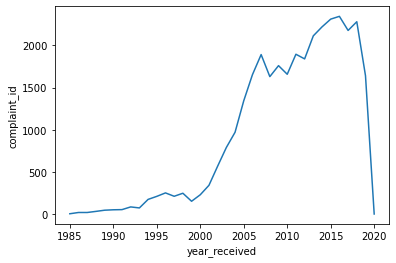

In [89]:
# Complaints by year
cp_by_yr = pig.groupby(['year_received'])['complaint_id'].count().reset_index()
# cp_by_yr

ax = sns.lineplot(x = 'year_received', y = 'complaint_id', data = cp_by_yr)

In [90]:
# Percentage of complaint type by precinct and complainant race
pct_cp = pig.groupby(['command_at_incident', 'fado_type', 'complainant_ethnicity'])['complaint_id'].count().reset_index()
pct_cp

pctcp_sorted = pct_cp.sort_values(['complaint_id'], ascending=[False])
pctcp_sorted

,command_at_incident,fado_type,complainant_ethnicity,complaint_id
869,075 PCT,Abuse of Authority,Black,570
943,079 PCT,Abuse of Authority,Black,381
840,073 PCT,Abuse of Authority,Black,348
908,077 PCT,Abuse of Authority,Black,334
702,067 PCT,Abuse of Authority,Black,311
...,...,...,...,...
1039,090 DET,Abuse of Authority,White,1
2049,P A T U,Abuse of Authority,White,1
1036,088 PCT,Force,Hispanic,1
1034,088 PCT,Discourtesy,White,1


In [91]:
# Outcomes of complaints
out = pig.groupby(['board_disposition'])['complaint_id'].count().reset_index()
out

# As percents
# out = df.groupby(['board_disposition'])['complaint_id'].value_counts(normalize=True) * 100
# out



,board_disposition,complaint_id
0,Exonerated,9609
1,Substantiated (Charges),3796
2,Substantiated (Command Discipline A),964
3,Substantiated (Command Discipline B),789
4,Substantiated (Command Discipline),851
5,Substantiated (Command Lvl Instructions),454
6,Substantiated (Formalized Training),1033
7,Substantiated (Instructions),248
8,Substantiated (MOS Unidentified),1
9,Substantiated (No Recommendations),165


In [92]:
pig.head(10)

,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,...,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,full_name
unique_mos_id,,,,,,,,,,,,,,,,,,,,,
10004,078 PCT,42835,7,2019,5,2020,078 PCT,POM,POM,Police Officer,...,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),Jonathan Ruiz
10007,078 PCT,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,...,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),John Sears
10007,078 PCT,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,...,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),John Sears
10007,078 PCT,26146,7,2012,9,2013,PBBS,POM,POM,Police Officer,...,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),John Sears
10009,078 PCT,40253,8,2018,2,2019,078 PCT,POF,POF,Police Officer,...,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),Noemi Sierra
10012,078 PCT,37256,5,2017,10,2017,078 PCT,SGT,SGT,Sergeant,...,White,Male,31.0,Abuse of Authority,Refusal to process civilian complaint,78.0,C/V telephoned PCT,No arrest made or summons issued,Substantiated (Command Lvl Instructions),Paula Smith
10014,078 PCT,33969,11,2015,2,2016,078 PCT,POM,POM,Police Officer,...,White,Male,34.0,Offensive Language,Sexual orientation,78.0,PD suspected C/V of violation/crime - street,Summons - other violation/crime,Substantiated (Formalized Training),Malachy Sullivan
10017,078 PCT,40070,8,2018,11,2018,078 PCT,POM,POM,Police Officer,...,Asian,Male,60.0,Discourtesy,Word,78.0,Moving violation,Moving violation summons issued,Unsubstantiated,Fazle Tanim
10017,078 PCT,41927,3,2019,8,2019,078 PCT,POM,POM,Police Officer,...,Asian,Male,39.0,Abuse of Authority,Refusal to provide shield number,78.0,Moving violation,Moving violation summons issued,Unsubstantiated,Fazle Tanim


In [110]:
latin_cop = pig[pig['mos_ethnicity'] == 'Black']
latin_cop

,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,...,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,full_name
unique_mos_id,,,,,,,,,,,,,,,,,,,,,
10012,078 PCT,37256,5,2017,10,2017,078 PCT,SGT,SGT,Sergeant,...,White,Male,31.0,Abuse of Authority,Refusal to process civilian complaint,78.0,C/V telephoned PCT,No arrest made or summons issued,Substantiated (Command Lvl Instructions),Paula Smith
10028,079 DET,21254,8,2010,12,2011,079 PCT,POM,DT3,Detective,...,Black,Male,22.0,Abuse of Authority,Threat of force (verbal or physical),79.0,Parking violation,No arrest made or summons issued,Substantiated (Charges),Elijah Austin
10028,079 DET,21254,8,2010,12,2011,079 PCT,POM,DT3,Detective,...,Black,Female,26.0,Abuse of Authority,Refusal to provide name/shield number,79.0,Parking violation,No arrest made or summons issued,Substantiated (Charges),Elijah Austin
10028,079 DET,21254,8,2010,12,2011,079 PCT,POM,DT3,Detective,...,Black,Male,22.0,Discourtesy,Word,79.0,Parking violation,No arrest made or summons issued,Substantiated (Charges),Elijah Austin
10028,079 DET,24891,1,2012,4,2013,079 PCT,POM,DT3,Detective,...,Black,Male,33.0,Abuse of Authority,Refusal to provide name/shield number,79.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Unsubstantiated,Elijah Austin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,078 PCT,9410,6,2005,9,2005,078 PCT,POM,POM,Police Officer,...,Hispanic,Male,27.0,Discourtesy,Word,78.0,Parking violation,Parking summons issued,Unsubstantiated,Hassan Paris
9984,078 PCT,42835,7,2019,5,2020,078 PCT,POM,POM,Police Officer,...,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),Hassan Paris
9984,078 PCT,42835,7,2019,5,2020,078 PCT,POM,POM,Police Officer,...,Black,Female,38.0,Abuse of Authority,Threat of summons,78.0,Report-domestic dispute,No arrest made or summons issued,Exonerated,Hassan Paris


In [ ]:
pig_info = pig[['first_name','last_name','rank_incident','rank_now', 'allegation', 'board_disposition']]
pig_info.sort_values('last_name', ascending=False)

In [ ]:
pig.allegation.counts()

In [ ]:
pig_spc = pig[['last_name','first_name','rank_incident','rank_now']]
pig_spc.head(7)
#pig_spc.alleagation.value_counts()

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,2)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(pig[0:12]['complaint_id'], c='purple')
plt.show()
sns.set(rc={'figure.figsize': (12,5)})

In [116]:
avg_char = pig.groupby(['full_name', 'complaint_id'])[['board_disposition' == 'Substantiated']]
avg_char

KeyError: 'Columns not found: False'